In [2]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.7/99.8 MB 22.8 MB/s eta 0:00:05
    --------------------------------------- 1.5/99.8 MB 23.9 MB/s eta 0:00:05
    --------------------------------------- 1.9/99.8 MB 17.2 MB/s eta 0:00:06
    --------------------------------------- 2.3/99.8 MB 13.1 MB/s eta 0:00:08
   - -------------------------------------- 2.5/99.8 MB 11.4 MB/s eta 0:00:09
   - -------------------------------------- 2.7/99.8 MB 11.4 MB/s eta 0:00:09
   - -------------------------------------- 3.2/99.8 MB 10.1 MB/s eta 0:00:10
   - -------------------------------------- 3.5/99.8 MB 9.6 MB/s eta 0:00:10
   - -------------------------------------- 3.6/99.8 MB 8.9 MB/s eta 0:00:11
   - --------------------

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
# Load the Titanic dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic_data = pd.read_csv(url)

# Explore the dataset
print(titanic_data.head())

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


In [17]:
# Data preprocessing
titanic_data.drop(['Name'], axis=1, inplace=True)  # Drop 'Name' column

# Convert categorical variables to numerical
titanic_data['Sex'] = titanic_data['Sex'].map({'female': 0, 'male': 1})

# Handle missing values
imputer = SimpleImputer(strategy='median')
titanic_data[['Age']] = imputer.fit_transform(titanic_data[['Age']])

In [18]:
# Split the dataset into features and target
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build an XGBoost Classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8146067415730337
Confusion Matrix:
[[97 14]
 [19 48]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       111
           1       0.77      0.72      0.74        67

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



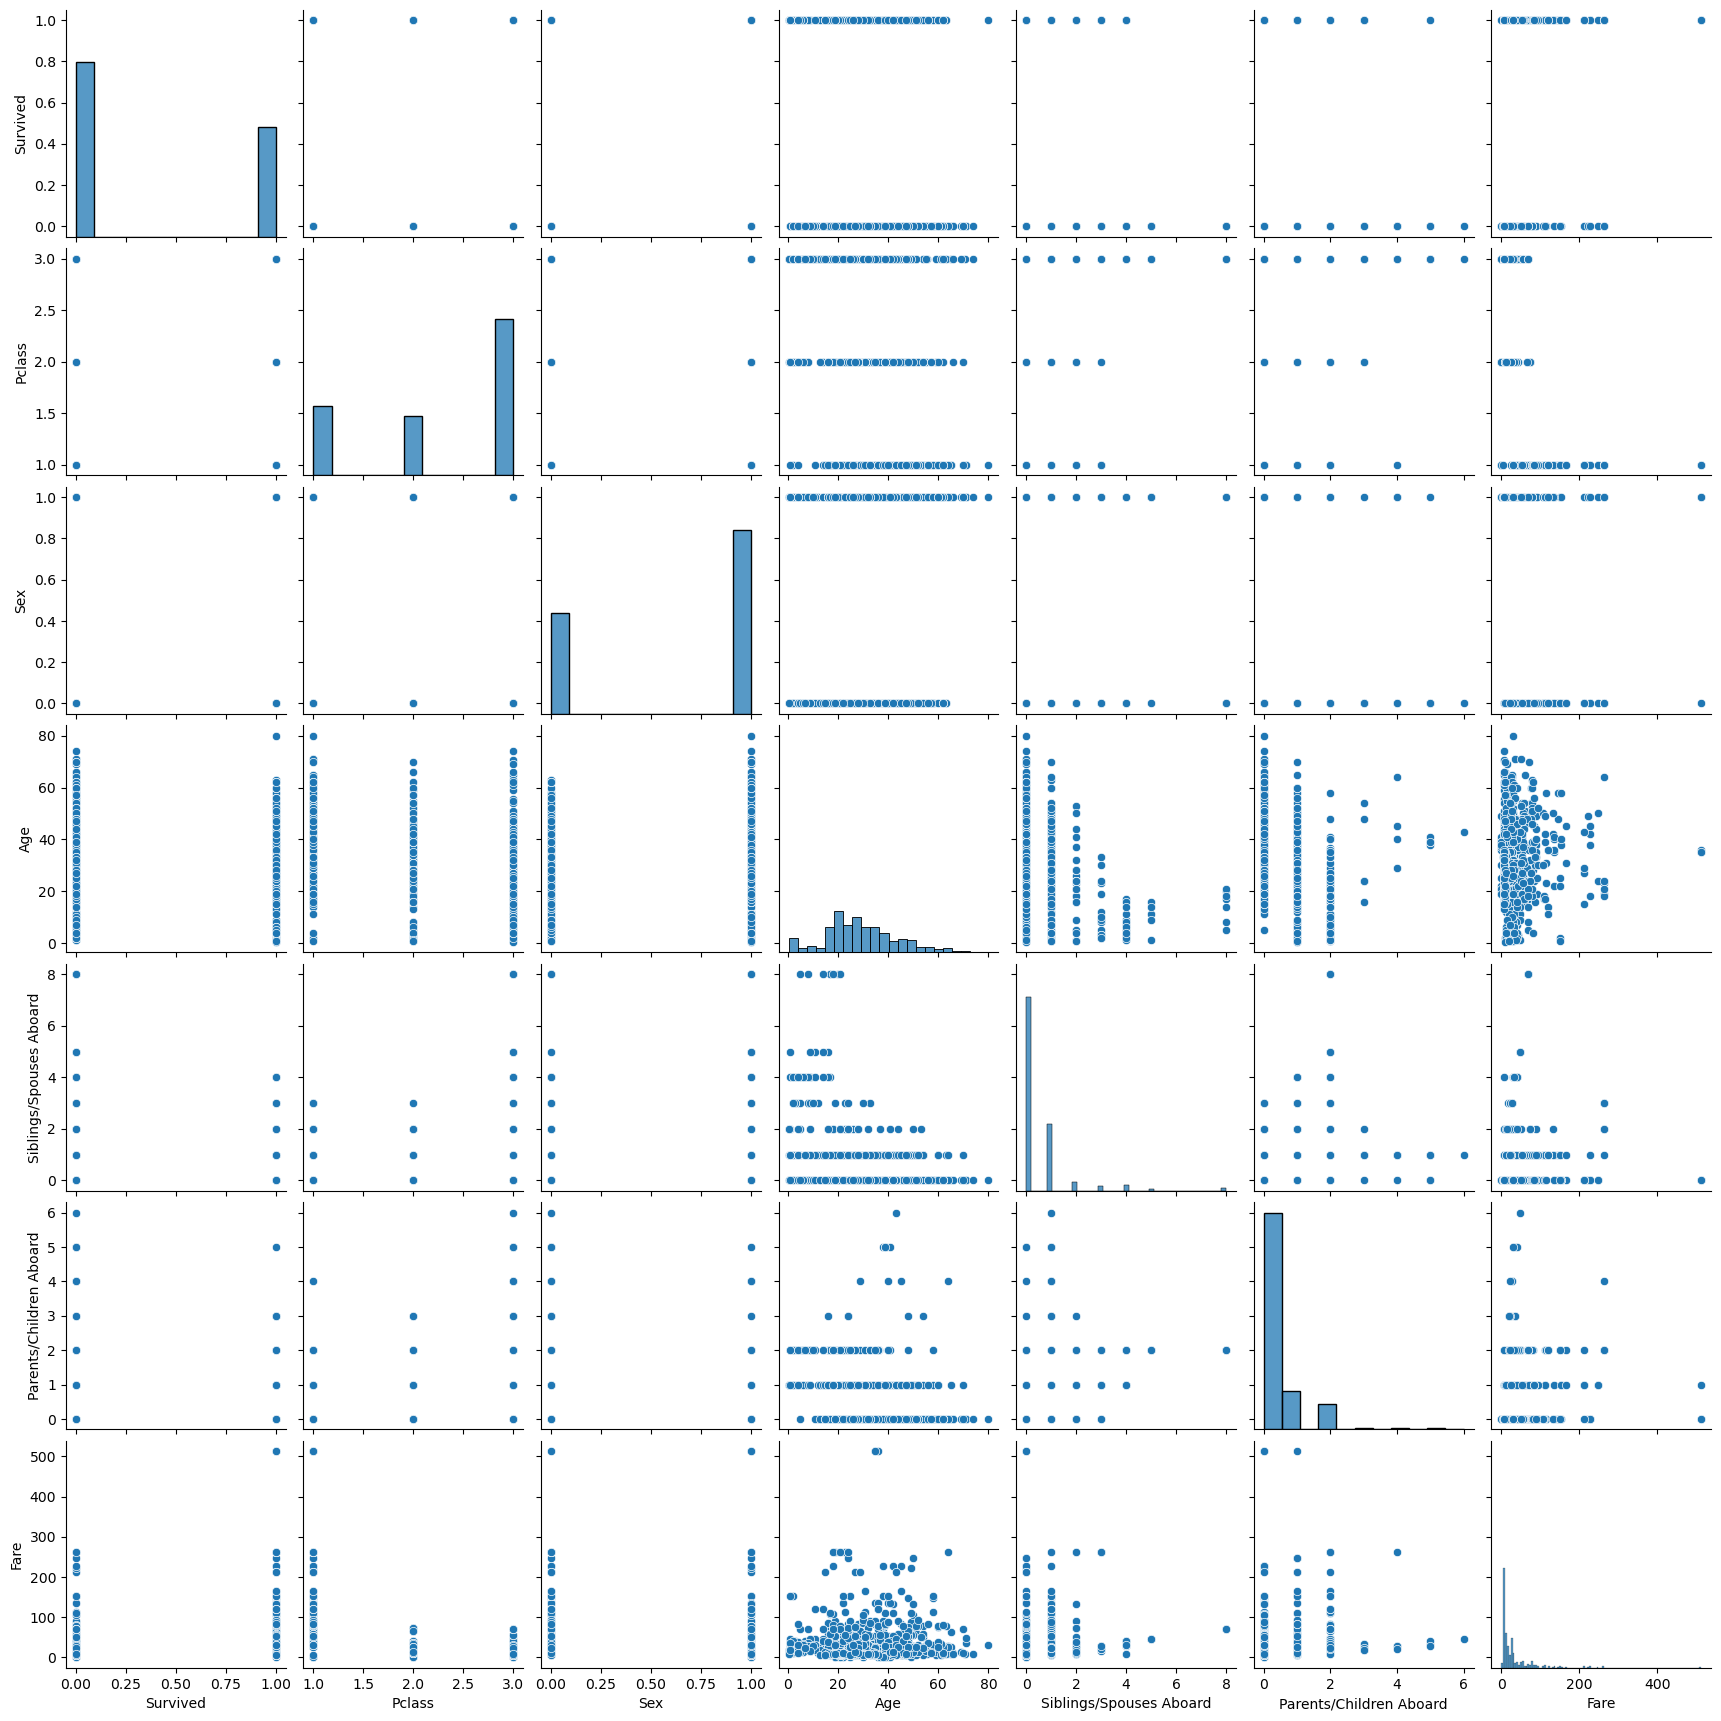

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(titanic_data[['Survived', 'Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']])
plt.show()


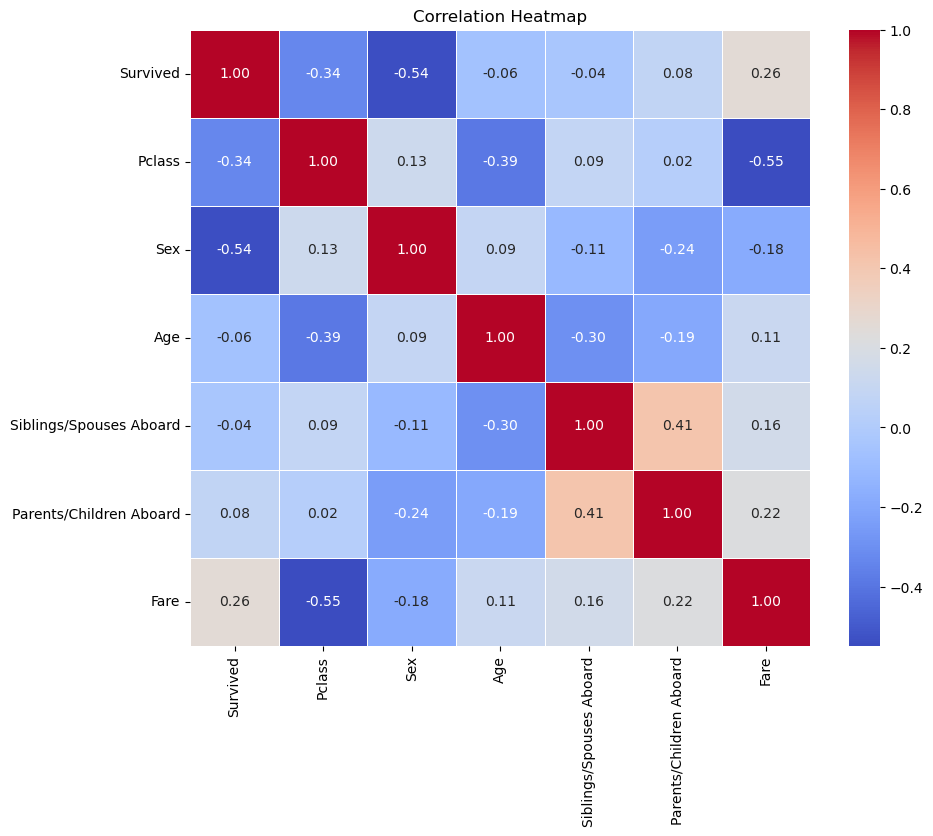

In [20]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = titanic_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Survival Count by Sex')

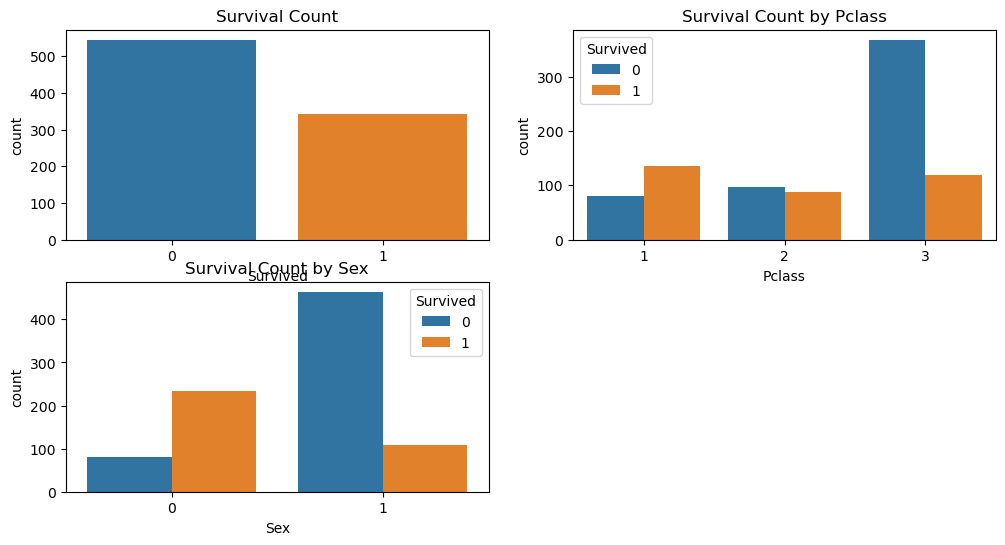

In [22]:
# Countplot for categorical features
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Count')

plt.subplot(2, 2, 2)
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
plt.title('Survival Count by Pclass')

plt.subplot(2, 2, 3)
sns.countplot(x='Sex', hue='Survived', data=titanic_data)
plt.title('Survival Count by Sex')